In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data=pd.read_csv('Country-data.csv',index_col='country')
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.shape

(167, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [5]:
#to check missingt values
data.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

> The  country data consist of 167 rows and 10 columns
> It consist of integer type data
> the country data does not possess any null value.

In [6]:
features=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp',]

# Handling Outliers

C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms

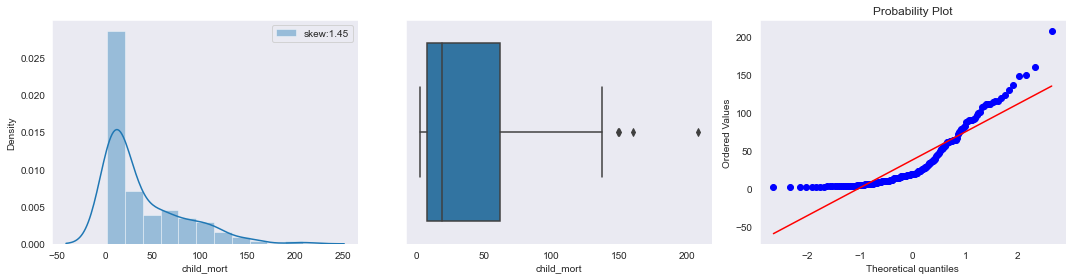

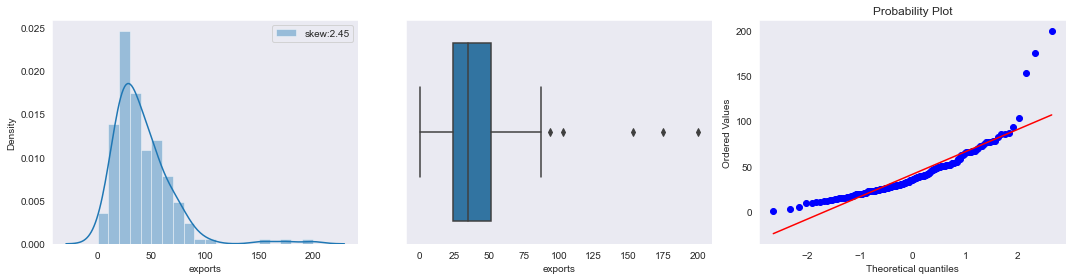

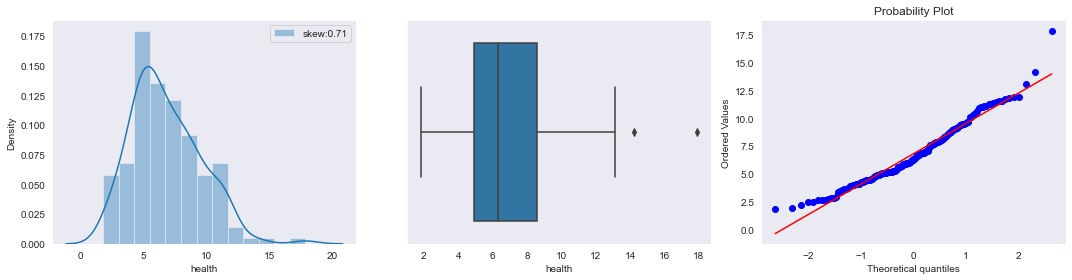

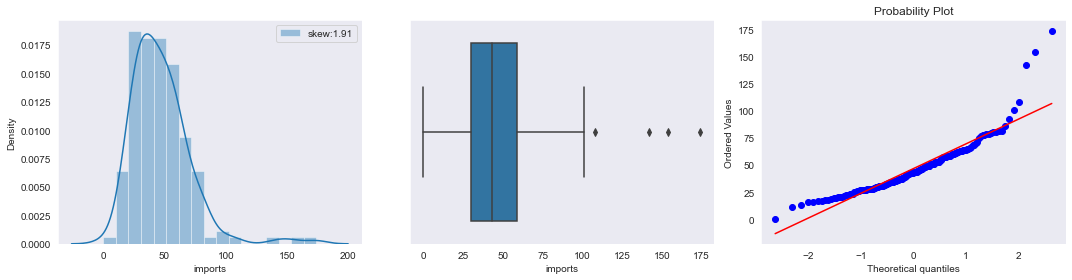

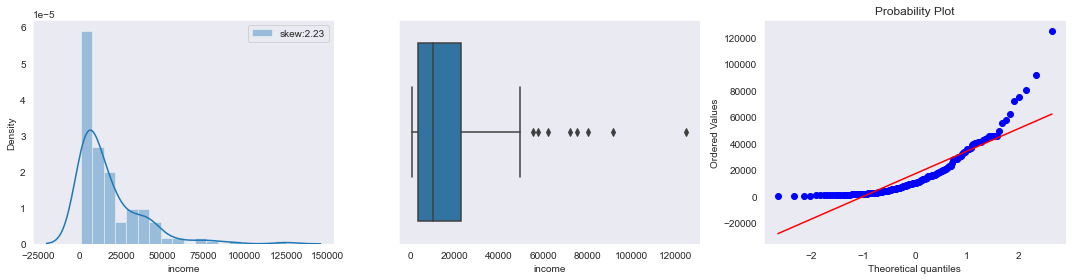

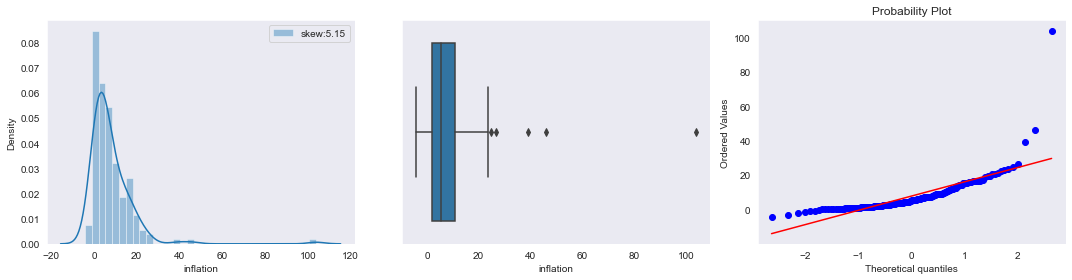

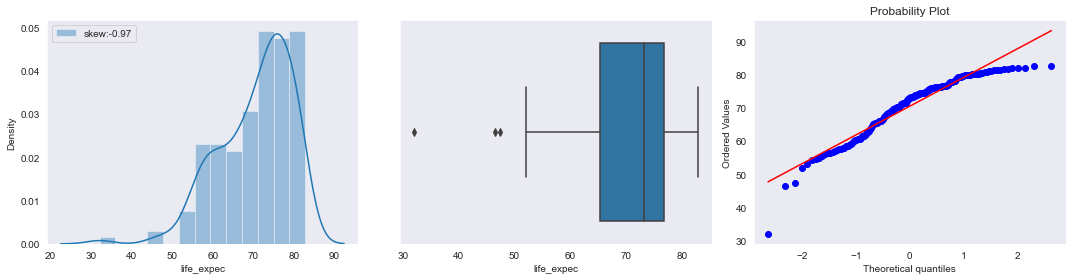

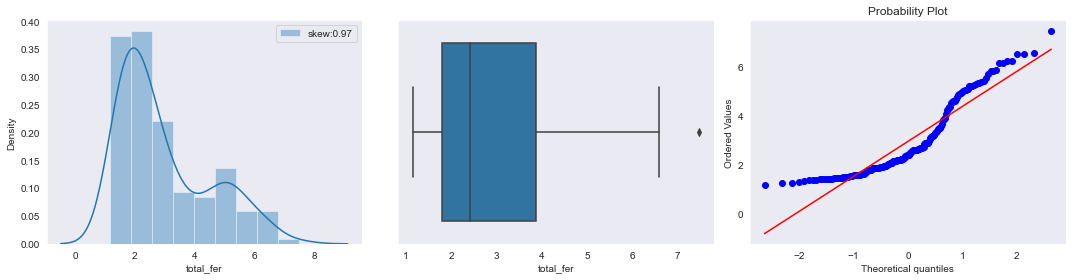

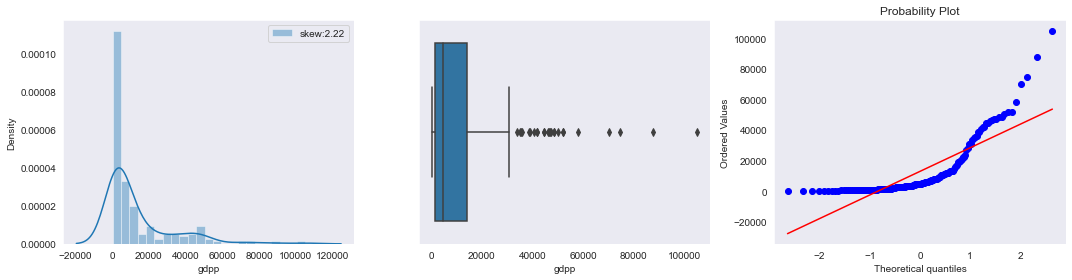

In [7]:
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(data[col],label='skew:' + str(np.round(data[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(data[col])
    plt.subplot(133)
    stats.probplot(data[col], plot=plt)
    plt.tight_layout()
    plt.show

> From the Density plot ,Boxplot and Probability plot the presence of outliers are clealy visible 
> Since the features in the data are not normally distibuted ( since it possess the skewness), here we using IQR to
  handle the corresponding outliers.
> 

In [9]:
#capping using IQR method
df=data.copy()
def iqr_capping(data,cols,factor):
    for col in cols:
        q1=data[col].quantile(0.25)
        q3=data[col].quantile(0.75)
        
        iqr=q3-q1
        upper_whisker=q3+(factor*iqr)
        lower_whisker=q1-(factor*iqr)
        
        data[col]=np.where(data[col]>upper_whisker,upper_whisker,np.where(data[col]<lower_whisker,lower_whisker,data[col]))  
        

In [10]:
iqr_capping(df, features,1.5)

C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


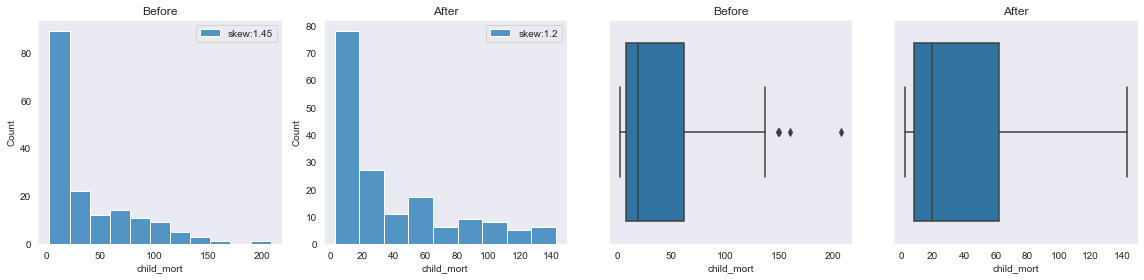

C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


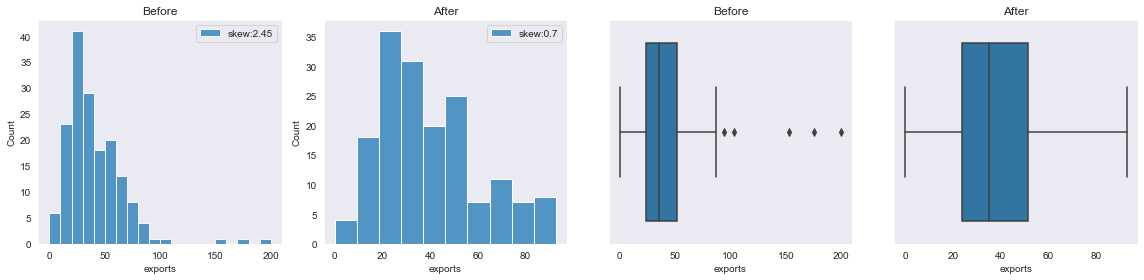

C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


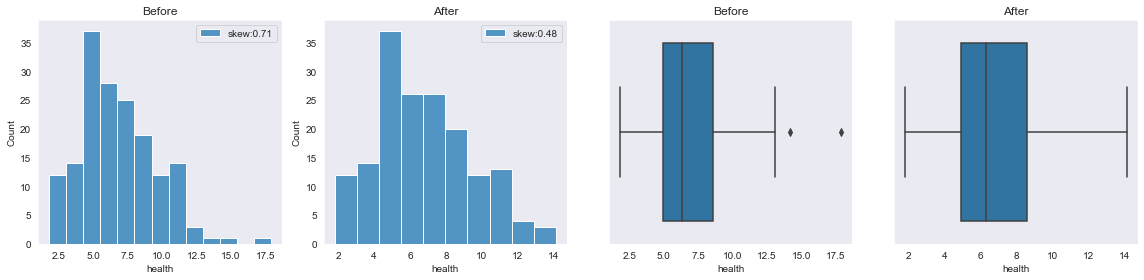

C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


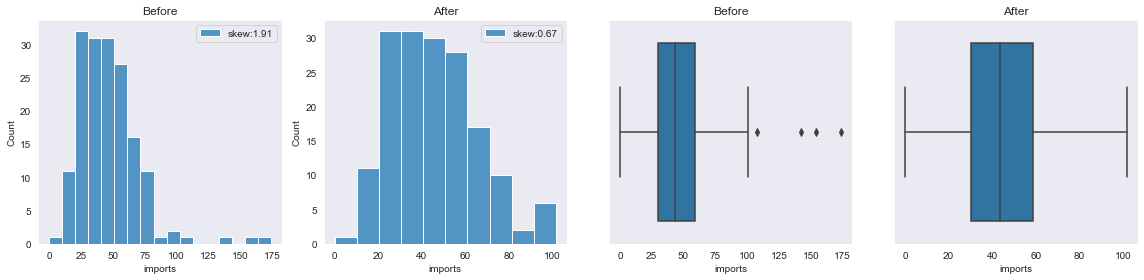

C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


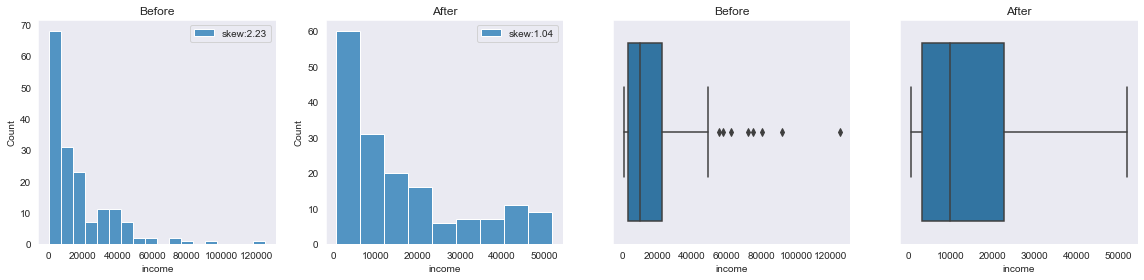

C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


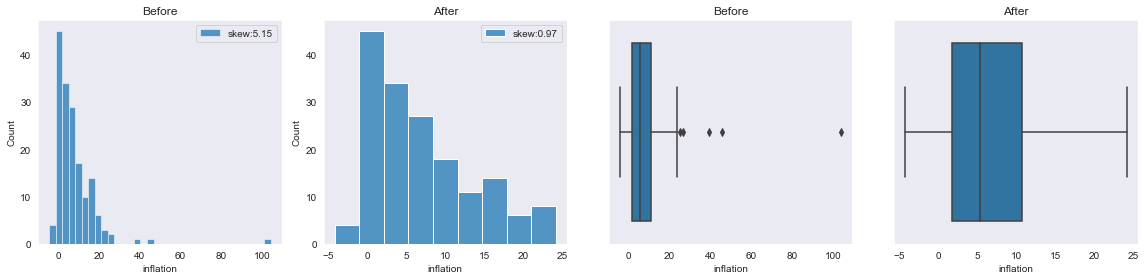

C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


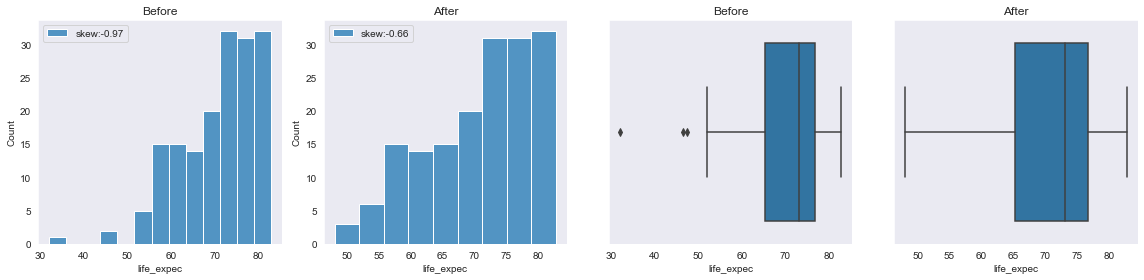

C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


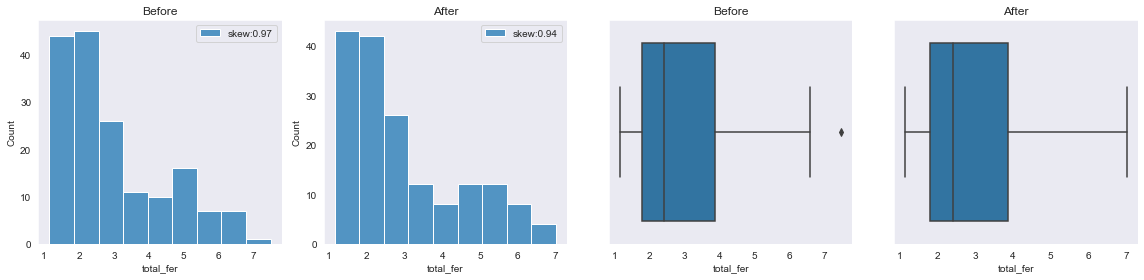

C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


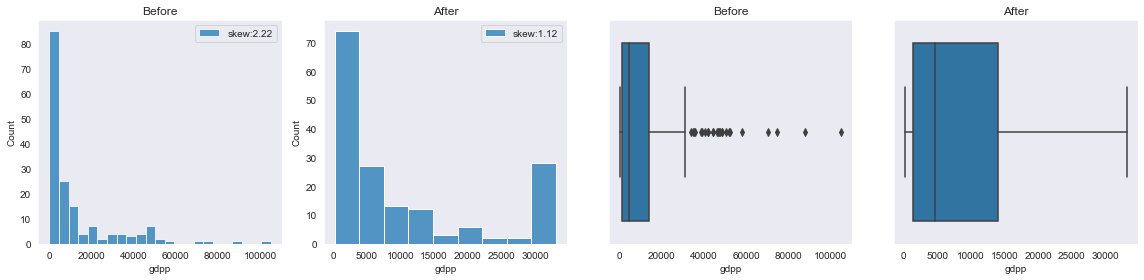

In [12]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.histplot(data[col],label='skew:' + str(np.round(data[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    
    plt.subplot(142)
    sns.histplot(df[col],label='skew:' + str(np.round(df[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(data[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

> Here we did Capping using IQR method and handled outliers with the upper or lower quartile of corresponding feature 

<AxesSubplot:>

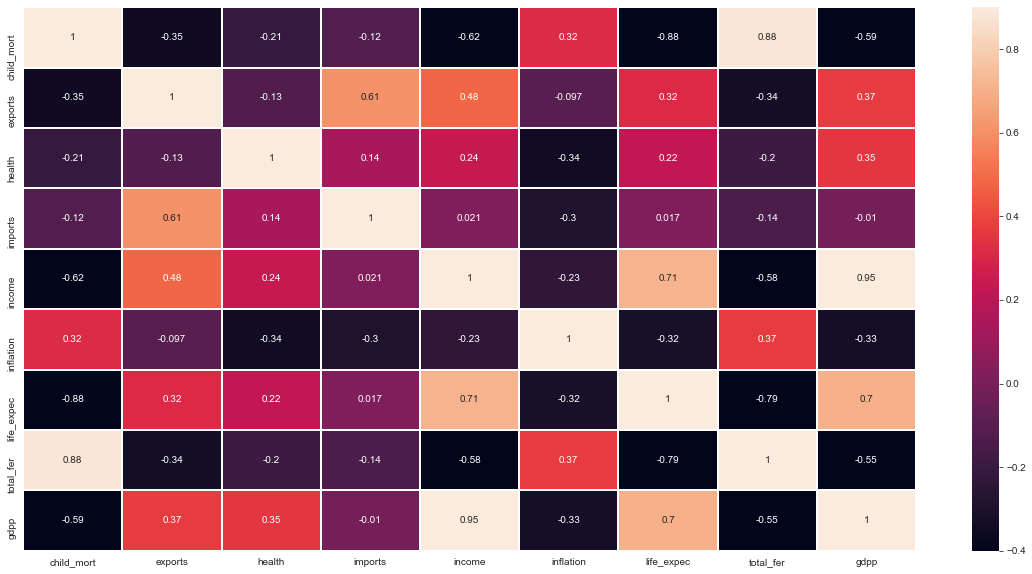

In [13]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,vmin=-0.4,vmax=0.9,annot=True,linewidth=0.2)

> There exist high positive correlation between gdp and income ,child mortality and total fertility.
> 

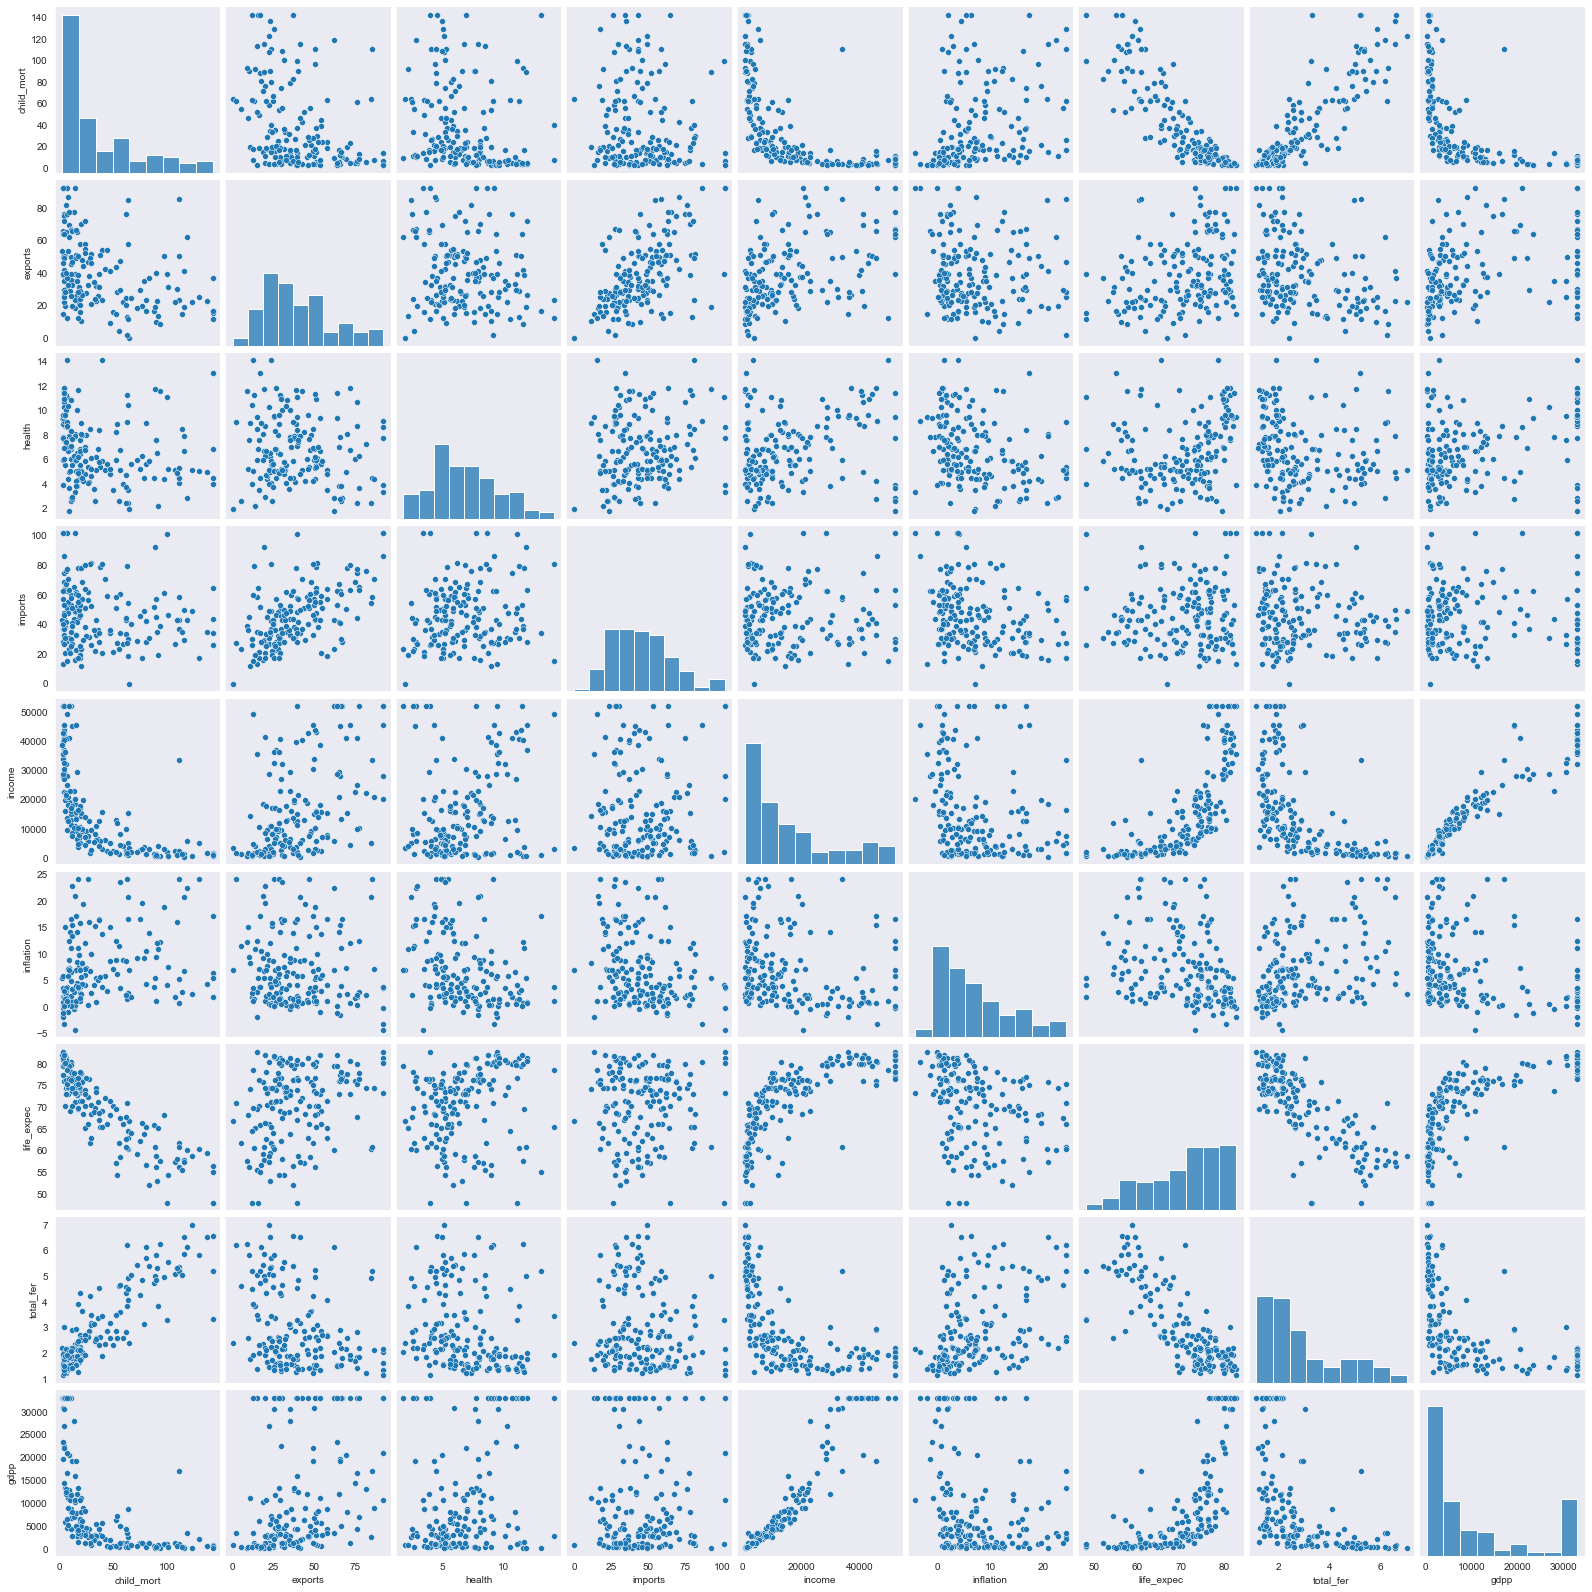

In [14]:
import seaborn as sns
sns.pairplot(df)

In [15]:
from sklearn import preprocessing

In [16]:
#Standardising the data
standardisation=preprocessing.StandardScaler()
df_scaled=standardisation.fit_transform(df)

df1=pd.DataFrame(df_scaled)
df1.columns = features
df1.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686


In [17]:
#Using Elbow method to find the optimal value of k.
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
    

C:\Users\RASHEED\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1503.0
993.1826568151515
768.9891834027545
671.6091994492798
596.9946567087097
537.1826440614602
480.996135037482
444.0499898776636
407.2109776877999
387.5694845257018


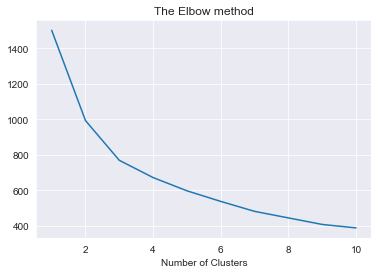

In [18]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel
plt.grid();

#the optimal no.of clusters are in between 2 and 4 so we took k as 3

In [19]:
kmeans=KMeans(n_clusters = 3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(df1) 
                               
type(df1)
y_kmeans

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [20]:
df1['cluster_3'] = y_kmeans
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_3
0,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341,1
1,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827,2
2,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868,2
3,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198,1
4,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686,2


In [21]:
#checking the country count per cluster

df1['cluster_3'].value_counts()

2    78
1    48
0    41
Name: cluster_3, dtype: int64

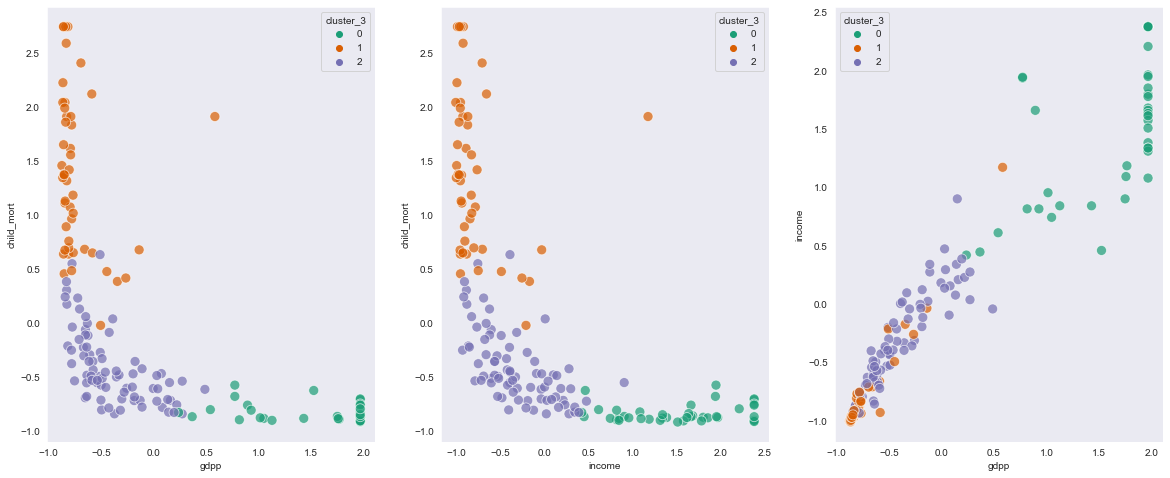

In [22]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_3',data=df1, legend='full', palette="Dark2",s=100,alpha = 0.7)

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_3',data=df1, legend='full', palette="Dark2",s=100,alpha=0.7)

plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_3',data=df1, legend='full', palette="Dark2",s=100,alpha=0.7)

plt.show()

> The scatterplot of gdpp and child mortality clearly indicating that as the gdp increases child mortality decreases and vice     versa.CLuster0 of this scatterplot has high gdpp and less child mortality where as cluster1 possess high child mortality and 
  less gdpp
> The scatterplot of income Vs child mortality is almost similar to the scatterplot of gdpp Vs child mortality so cluster0 is 
  much better than other 2 clusters 
> The scatterplot of gdpp Vs income shows a positive relation in which gdpp increases the income also increases in which         cluster0 has high gdpp and high income and cluster1 has low gdpp and low income 


Insight:
Cluster 0 seems to be for Developed countries with highest GDP and Income range and lowest child mortality.
Cluster 2 is for Developing Countries with medium income and GDP range and lower child mortality.
Cluster 1 seems to be underdeveloped countries with highest child mortality and lowest income and gdp.